In [323]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
accounts = pd.read_csv(r'accounts.csv')
person = pd.read_csv(r'person.csv')
transactions = pd.read_csv(r'transactions.csv')

In [325]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7569 entries, 0 to 7568
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7569 non-null   object 
 1   type           7569 non-null   object 
 2   subtype        7569 non-null   object 
 3   balance        7569 non-null   float64
 4   currency_code  7569 non-null   object 
 5   name           7569 non-null   object 
 6   person_id      7569 non-null   object 
 7   account_id     7569 non-null   object 
 8   date           7569 non-null   object 
dtypes: float64(1), object(8)
memory usage: 532.3+ KB


In [326]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2531 non-null   object
 1   name         2531 non-null   object
 2   suitability  2084 non-null   object
dtypes: object(3)
memory usage: 59.4+ KB


In [327]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400110 entries, 0 to 400109
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             400110 non-null  object 
 1   currency_code  400110 non-null  object 
 2   amount         400110 non-null  float64
 3   date           400110 non-null  object 
 4   category       368501 non-null  object 
 5   account_id     400110 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


- currency_code
- suitability

In [328]:
accounts.head()


,id,type,subtype,balance,currency_code,name,person_id,account_id,date
0,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16
1,978f92cf-8d5b-437a-a046-cdaa9105624c,CREDIT,CREDIT_CARD,6311.67,BRL,Cartão de Crédito,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,978f92cf-8d5b-437a-a046-cdaa9105624c,2023-09-15 15:50:21
2,dcd96f70-8b16-42b0-a944-afec5d8305ce,CREDIT,CREDIT_CARD,7482.25,BRL,Cartão de Crédito,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,dcd96f70-8b16-42b0-a944-afec5d8305ce,2023-09-09 03:38:49
3,6c2a44fe-2ba7-4626-aaff-f244a0647eae,BANK,SAVINGS_ACCOUNT,5740.29,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,6c2a44fe-2ba7-4626-aaff-f244a0647eae,2023-09-12 14:21:21
4,abb359a2-3802-48e7-976b-8671e1de0884,BANK,CHECKING_ACCOUNT,5136.49,BRL,Conta Corrente,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,abb359a2-3802-48e7-976b-8671e1de0884,2023-09-12 04:10:04


In [329]:
pd.crosstab(accounts['name'], accounts['subtype'])

subtype,CHECKING_ACCOUNT,CREDIT_CARD,SAVINGS_ACCOUNT
name,,,
Caixinha,0,0,792
Cartão de Crédito,0,2619,0
Conta Corrente,2509,0,0
Conta Remunerada,0,0,804
Poupança,0,0,845


In [330]:
person.head()

,id,name,suitability
0,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador
1,01018c18-ecb5-4cb6-b16f-bece97935974,Emilly Moura,moderado-agressivo
2,65d3336e-dafd-4663-8a53-97792c847074,Luiz Miguel Caldeira,conservador
3,6a33c027-13f2-4fbf-8bbb-74e6438d11c8,Sarah Souza,moderado-conservador
4,55252085-c5d6-4b7d-b221-fd3ad76ba8e5,Samuel Oliveira,moderado-agressivo


In [331]:
person['suitability'].value_counts(True).reset_index()

,suitability,proportion
0,agressivo,0.213052
1,conservador,0.202495
2,moderado-agressivo,0.201536
3,moderado,0.196737
4,moderado-conservador,0.186180


In [332]:
transactions.head()

,id,currency_code,amount,date,category,account_id
0,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação,1968bd13-dd25-4f88-bccc-5cff92d6811b
1,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b
2,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte,1968bd13-dd25-4f88-bccc-5cff92d6811b
3,5a78f1f0-f541-440f-9d3d-c8c21373ffc8,BRL,-262.70,2023-06-21 00:34:08,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b
4,fc4e9552-bb41-4757-8c16-ff2c584ee01b,BRL,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa",1968bd13-dd25-4f88-bccc-5cff92d6811b


In [333]:
(transactions['id'].value_counts() > 1).sum()

0

In [334]:
transactions['currency_code'].value_counts()

currency_code
BRL    400110
Name: count, dtype: int64

In [335]:
transactions['category'].value_counts(True).reset_index()

,category,proportion
0,Recebido,0.097435
1,Transporte,0.092670
2,Moradia,0.092648
3,"Imposto, juros e multa",0.092190
4,Compras,0.091829
5,Outras saídas,0.091826
6,Alimentação,0.089221
7,Investimento,0.088681
8,Lazer,0.088410
9,Educação,0.087712


In [336]:
(transactions['amount'] > 0).value_counts()

amount
False    331526
True      68584
Name: count, dtype: int64

In [337]:
transactions['isin'] = (transactions['amount'] > 0)

In [338]:
pd.crosstab(transactions['category'], transactions['isin'])

isin,False,True
category,,
Alimentação,32878,0
Compras,33839,0
Educação,32322,0
"Imposto, juros e multa",33972,0
Investimento,0,32679
Lazer,32579,0
Moradia,34141,0
Outras saídas,33838,0
Recebido,0,35905


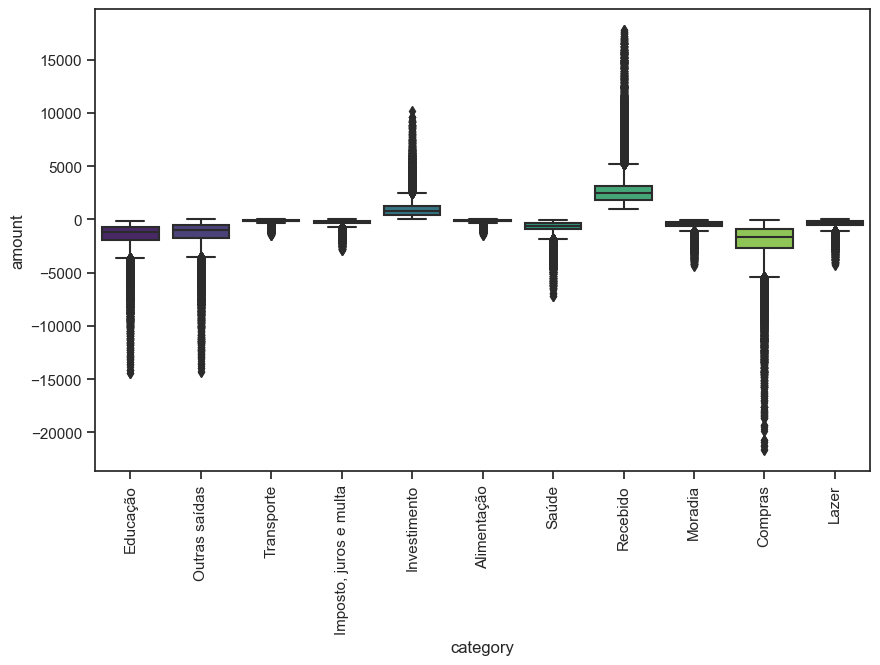

In [339]:
import seaborn as sns
plt.figure(figsize=(10,6))
#inserindo os boxplots
sns.boxplot(data=transactions, x='category', y='amount', palette='viridis');
plt.xticks(rotation=90);

In [340]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400110 entries, 0 to 400109
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             400110 non-null  object 
 1   currency_code  400110 non-null  object 
 2   amount         400110 non-null  float64
 3   date           400110 non-null  object 
 4   category       368501 non-null  object 
 5   account_id     400110 non-null  object 
 6   isin           400110 non-null  bool   
dtypes: bool(1), float64(1), object(5)
memory usage: 18.7+ MB


In [341]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date'].dt.date

0         2023-07-20
1         2023-07-23
2         2023-06-26
3         2023-06-21
4         2023-08-05
             ...    
400105    2022-12-02
400106    2023-07-22
400107    2023-07-24
400108    2023-06-25
400109    2023-06-17
Name: date, Length: 400110, dtype: object

In [342]:
transactions['only_date'] = transactions['date'].dt.date
transactions.head()

,id,currency_code,amount,date,category,account_id,isin,only_date
0,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação,1968bd13-dd25-4f88-bccc-5cff92d6811b,False,2023-07-20
1,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b,False,2023-07-23
2,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte,1968bd13-dd25-4f88-bccc-5cff92d6811b,False,2023-06-26
3,5a78f1f0-f541-440f-9d3d-c8c21373ffc8,BRL,-262.70,2023-06-21 00:34:08,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b,False,2023-06-21
4,fc4e9552-bb41-4757-8c16-ff2c584ee01b,BRL,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa",1968bd13-dd25-4f88-bccc-5cff92d6811b,False,2023-08-05


In [343]:
saldo_cliente = transactions.groupby('id').amount.sum().reset_index()
saldo_cliente[saldo_cliente['amount'] > 0].reset_index()

,index,id,amount
0,4,0001c0f4-c274-4325-a55c-c63b732cde58,9869.21
1,6,0001e28b-6cdd-41e9-9ba6-41f60cac1a11,91.39
2,8,00029ccb-f109-4736-822c-d0f97dee0be4,592.28
3,18,0003a285-f03f-425d-a337-8dfcf6c956ce,2879.77
4,19,0003a5d8-cd74-4bbe-8667-f79f3649b297,2761.80
...,...,...,...
68579,400062,fff7621e-cee9-4d82-aa67-d8bdee1d5f38,1463.45
68580,400063,fff7aa97-27a1-4d7f-8ad3-dcc6b1ed7bfb,2750.11
68581,400082,fffb5394-0a8e-4c83-bd50-d12cad5d7f17,646.55
68582,400104,fffee094-ef6a-486c-a9b0-b6329be94a94,2216.19


In [344]:
date_graf = transactions['only_date'].value_counts().reset_index()
date_graf.head(10)

,only_date,count
0,2023-06-30,4559
1,2023-07-09,4546
2,2023-06-29,4544
3,2023-06-28,4537
4,2023-07-07,4518
5,2023-07-23,4506
6,2023-06-27,4506
7,2023-06-22,4501
8,2023-07-04,4499
9,2023-07-28,4492


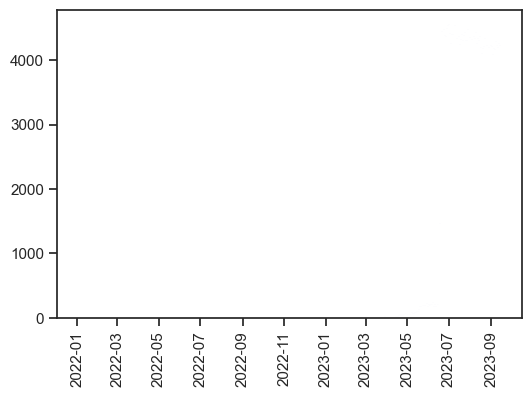

In [345]:
plt.figure(figsize=(6, 4))
plt.bar(x=date_graf['only_date'], height=date_graf['count'])
plt.xticks(rotation=90);

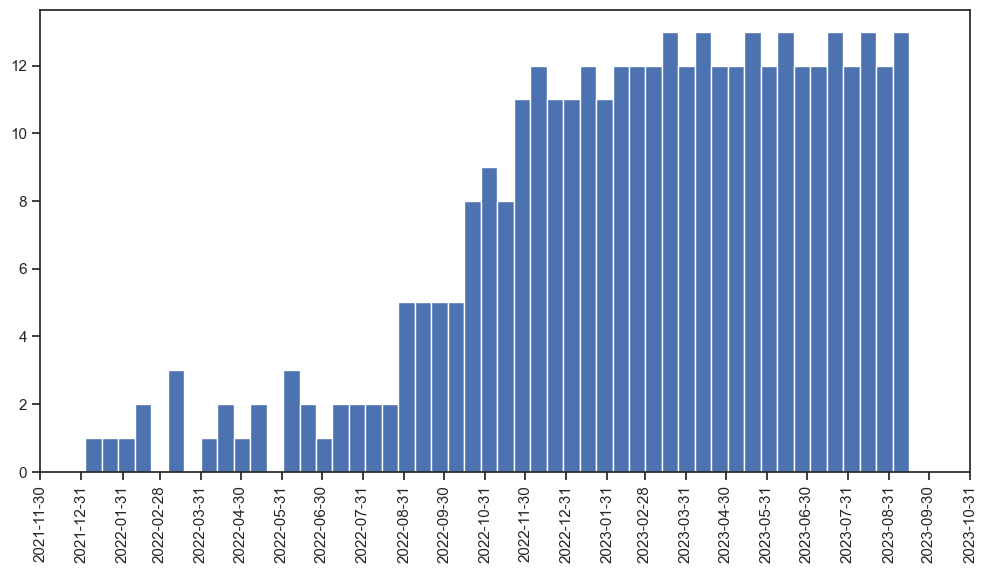

In [346]:
plt.figure(figsize=(12,6))

rotulos_do_eixo_x = pd.date_range(start='2021-11-01', end='2023-10-31', freq='M')

plt.hist(x=date_graf['only_date'], bins=50)
plt.xticks(rotation=90);
plt.xticks(rotulos_do_eixo_x);

## Unindo dfs

In [347]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400110 entries, 0 to 400109
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             400110 non-null  object        
 1   currency_code  400110 non-null  object        
 2   amount         400110 non-null  float64       
 3   date           400110 non-null  datetime64[ns]
 4   category       368501 non-null  object        
 5   account_id     400110 non-null  object        
 6   isin           400110 non-null  bool          
 7   only_date      400110 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(5)
memory usage: 21.7+ MB


In [348]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7569 entries, 0 to 7568
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7569 non-null   object 
 1   type           7569 non-null   object 
 2   subtype        7569 non-null   object 
 3   balance        7569 non-null   float64
 4   currency_code  7569 non-null   object 
 5   name           7569 non-null   object 
 6   person_id      7569 non-null   object 
 7   account_id     7569 non-null   object 
 8   date           7569 non-null   object 
dtypes: float64(1), object(8)
memory usage: 532.3+ KB


In [349]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2531 non-null   object
 1   name         2531 non-null   object
 2   suitability  2084 non-null   object
dtypes: object(3)
memory usage: 59.4+ KB


In [350]:
merge = pd.merge(transactions, accounts, how = 'left', on = 'account_id')
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400110 entries, 0 to 400109
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_x             400110 non-null  object        
 1   currency_code_x  400110 non-null  object        
 2   amount           400110 non-null  float64       
 3   date_x           400110 non-null  datetime64[ns]
 4   category         368501 non-null  object        
 5   account_id       400110 non-null  object        
 6   isin             400110 non-null  bool          
 7   only_date        400110 non-null  object        
 8   id_y             400110 non-null  object        
 9   type             400110 non-null  object        
 10  subtype          400110 non-null  object        
 11  balance          400110 non-null  float64       
 12  currency_code_y  400110 non-null  object        
 13  name             400110 non-null  object        
 14  person_id        400

In [351]:
df = pd.merge(merge, person, how='inner', left_on='person_id', right_on='id')


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400110 entries, 0 to 400109
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_x             400110 non-null  object        
 1   currency_code_x  400110 non-null  object        
 2   amount           400110 non-null  float64       
 3   date_x           400110 non-null  datetime64[ns]
 4   category         368501 non-null  object        
 5   account_id       400110 non-null  object        
 6   isin             400110 non-null  bool          
 7   only_date        400110 non-null  object        
 8   id_y             400110 non-null  object        
 9   type             400110 non-null  object        
 10  subtype          400110 non-null  object        
 11  balance          400110 non-null  float64       
 12  currency_code_y  400110 non-null  object        
 13  name_x           400110 non-null  object        
 14  person_id        400

In [353]:
df = df.rename(columns={'id_x':'id', 'currency_code_x':'currency_code','date_x': 'date','name_x':'name','id':'person'})


In [354]:
df.drop(columns = ['id_y','currency_code_y','date_y','name_y', 'person'], inplace=True)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400110 entries, 0 to 400109
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             400110 non-null  object        
 1   currency_code  400110 non-null  object        
 2   amount         400110 non-null  float64       
 3   date           400110 non-null  datetime64[ns]
 4   category       368501 non-null  object        
 5   account_id     400110 non-null  object        
 6   isin           400110 non-null  bool          
 7   only_date      400110 non-null  object        
 8   type           400110 non-null  object        
 9   subtype        400110 non-null  object        
 10  balance        400110 non-null  float64       
 11  name           400110 non-null  object        
 12  person_id      400110 non-null  object        
 13  suitability    330341 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(10

In [356]:
df['date'] = pd.to_datetime(df['date'])
df['only_date'] = pd.to_datetime(df['only_date'])

In [357]:
df['dia_semana'] = df['date'].dt.day_name() 

In [358]:
df.head(3)

,id,currency_code,amount,date,category,account_id,isin,only_date,type,subtype,balance,name,person_id,suitability,dia_semana
0,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação,1968bd13-dd25-4f88-bccc-5cff92d6811b,False,2023-07-20,BANK,SAVINGS_ACCOUNT,3826.72,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,conservador,Thursday
1,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b,False,2023-07-23,BANK,SAVINGS_ACCOUNT,3826.72,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,conservador,Sunday
2,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte,1968bd13-dd25-4f88-bccc-5cff92d6811b,False,2023-06-26,BANK,SAVINGS_ACCOUNT,3826.72,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,conservador,Monday


In [359]:
df['dia_semana'].value_counts()

dia_semana
Tuesday      58171
Wednesday    57940
Sunday       57698
Thursday     57655
Monday       57569
Friday       56448
Saturday     54629
Name: count, dtype: int64